<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Bellman_Ford.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Dos posibles resultados:
1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

Problema de optimizacion en busca de encontrar el camino mas corto, este problema tal como su nombre lo indica consiste en encontrar una ruta que conecte a dos o mas nodos de modo que la distancia entre ellos sea minima y para su solucion sera ocupado el alogoritmo de optimizacion Bellman-Ford.

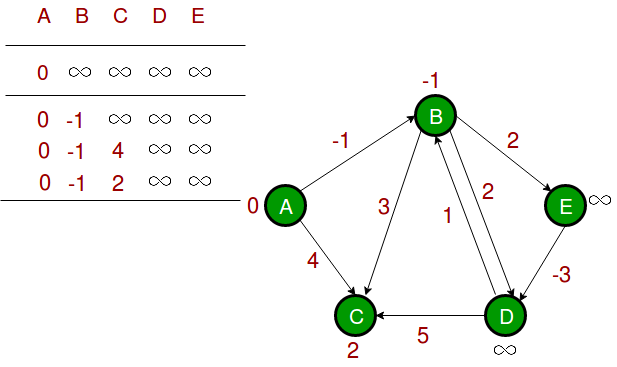

# 2 Descripcion del algoritmo

El algoritmo Bellman-Ford con programacion dinamica, busca encontrar el camino mas corto dentro de un grafo, ademas es un metodo que sirve para reducir el tiempo de ejecucion de un algoritmo mediante el uso de subproblemas y subestructuras optimas. Este algoritmo es correcto de usar en este tipo de problema debido a que siempre resuelve los subproblemas pensando en obtener una solucion global/general del problema.

Cabe recalcar que una de sus principales ventajas es que encuentra el camino mas corto incluso si este contiene arcos negativos, tambien cumple la funcion de identificar ciclos negativos es decir cuando este no tiene solucion.

Para resolver este problema con programacion dinamica debe de seguir los siguiente pasos:

1. Se inicializa todos los vertices y se establece su distancia, desde el nodo origen a cualquier nodo sera infinito, sin embargo la distancia de ese mismo nodo origen sera 0. 

2. Creamos dos ciclos iterativos(for) y anidados Donde mediante el uso de la subestructura optima lograremos encontrar el camino mas optimo para cada uno de los nodos originados en el grafo ademas de verificar si existe o no ciclos negativos.

3. Devolvemos los valores de distancia para todos los nodos una vez completadas todas las iteraciones.



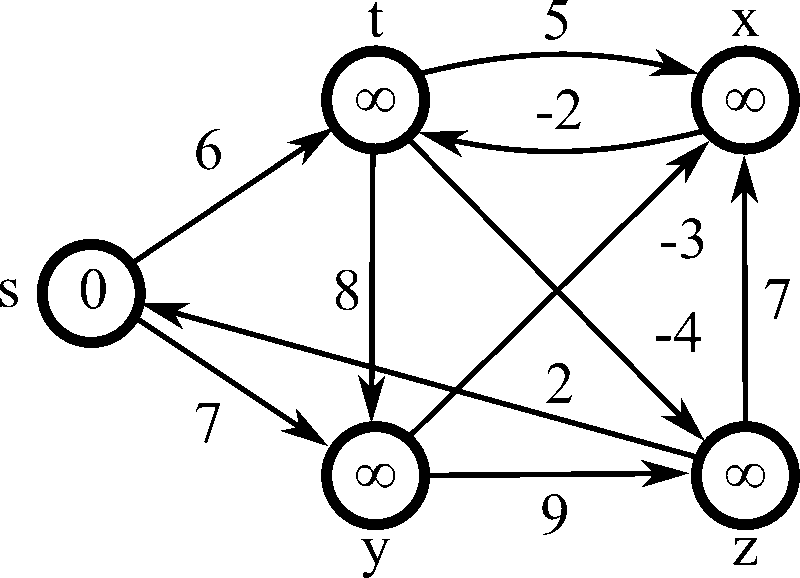

Algoritmo de Dijkstra al igual que como mencionamos anteriormente este algoritmo busca solucionar el problema del camino mas corto dentro de un grafo, pero con significativas diferencias respecto al Bullman-Ford debido que este no puede trabajar con aristas ni ciclos que sean negativos por lo que no puede de encontrar el camino mas optimo para conectar todo tipo de nodos, aunque para problemas con aristas positivas este lo solucionara de manera mas optima debdio a su modo de funcionamiento, ya que mientras Bullman-Ford busca el camino optimo de todos los nodos a nivel general el algoritmo de Dijkstra busca **''el''** camino mas optimo.

Para resolver este problema con el algoritmo de Dijkstra debe de seguir los siguiente pasos:

1. Marca el nodo inicial que elegiste con una distancia actual de 0 y el resto con infinito.

2. Establece el nodo no visitado con la menor distancia actual como el nodo actual A.

3. Para cada vecino V de tu nodo actual A: suma la distancia actual de A con el peso de la arista que conecta a A con V. Si el resultado es menor que la distancia actual de V, establécelo como la nueva distancia actual de V.

4. Marca el nodo actual A como visitado.

5. Si hay nodos no visitados, ve al paso 2.

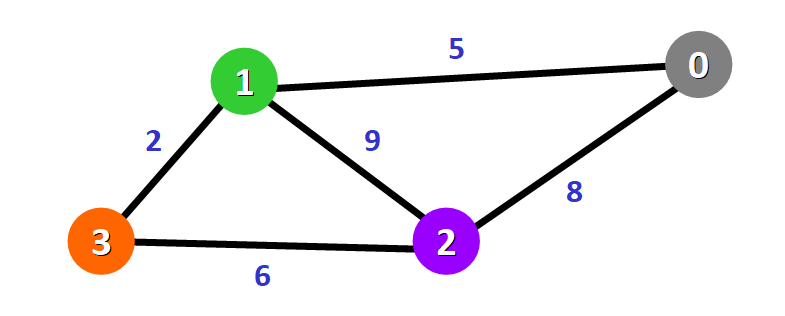

# 2.2 Algoritmo Bellman-Ford

A continuacion se moestrara codigo de su funcionamiento tanto de **Bellman-Ford** como de **Dijkstra**.

In [7]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout


In [6]:
def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

In [8]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [40]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph

# Library for INT_MAX
import sys


class Graph():

	def __init__(self, vertices):
		self.V = vertices
		self.graph = [[0 for column in range(vertices)]
					for row in range(vertices)]

	def printSolution(self, dist):
		print("Vertex \tDistance from Source")
		for node in range(self.V):
			print(node, "\t", dist[node])

	# A utility function to find the vertex with
	# minimum distance value, from the set of vertices
	# not yet included in shortest path tree
	def minDistance(self, dist, sptSet):

		# Initialize minimum distance for next node
		min = sys.maxsize

		# Search not nearest vertex not in the
		# shortest path tree
		for u in range(self.V):
			if dist[u] < min and sptSet[u] == False:
				min = dist[u]
				min_index = u

		return min_index

	# Function that implements Dijkstra's single source
	# shortest path algorithm for a graph represented
	# using adjacency matrix representation
	def dijkstra(self, src):

		dist = [sys.maxsize] * self.V
		dist[src] = 0
		sptSet = [False] * self.V

		for cout in range(self.V):

			# Pick the minimum distance vertex from
			# the set of vertices not yet processed.
			# x is always equal to src in first iteration
			x = self.minDistance(dist, sptSet)

			# Put the minimum distance vertex in the
			# shortest path tree
			sptSet[x] = True

			# Update dist value of the adjacent vertices
			# of the picked vertex only if the current
			# distance is greater than new distance and
			# the vertex in not in the shortest path tree
			for y in range(self.V):
				if self.graph[x][y] > 0 and sptSet[y] == False and \
						dist[y] > dist[x] + self.graph[x][y]:
					dist[y] = dist[x] + self.graph[x][y]

		self.printSolution(dist)


# Driver's code
if __name__ == "__main__":
	g = Graph(9)
	g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
			[4, 0, 8, 0, 0, 0, 0, 11, 0],
			[0, 8, 0, 7, 0, 4, 0, 0, 2],
			[0, 0, 7, 0, 9, 14, 0, 0, 0],
			[0, 0, 0, 9, 0, 10, 0, 0, 0],
			[0, 0, 4, 14, 10, 0, 2, 0, 0],
			[0, 0, 0, 0, 0, 2, 0, 1, 6],
			[8, 11, 0, 0, 0, 0, 1, 0, 7],
			[0, 0, 2, 0, 0, 0, 6, 7, 0]
			]

	g.dijkstra(0)

# This code is contributed by Divyanshu Mehta and Updated by Pranav Singh Sambyal



Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14


In [41]:
# Dijkstra's Algorithm in Python


import sys

# Providing the graph
vertices = [[0, 0, 1, 1, 0, 0, 0],
            [0, 0, 1, 0, 0, 1, 0],
            [1, 1, 0, 1, 1, 0, 0],
            [1, 0, 1, 0, 0, 0, 1],
            [0, 0, 1, 0, 0, 1, 0],
            [0, 1, 0, 0, 1, 0, 1],
            [0, 0, 0, 1, 0, 1, 0]]

edges = [[0, 0, 1, 2, 0, 0, 0],
         [0, 0, 2, 0, 0, 3, 0],
         [1, 2, 0, 1, 3, 0, 0],
         [2, 0, 1, 0, 0, 0, 1],
         [0, 0, 3, 0, 0, 2, 0],
         [0, 3, 0, 0, 2, 0, 1],
         [0, 0, 0, 1, 0, 1, 0]]

# Find which vertex is to be visited next
def to_be_visited():
    global visited_and_distance
    v = -10
    for index in range(num_of_vertices):
        if visited_and_distance[index][0] == 0 \
            and (v < 0 or visited_and_distance[index][1] <=
                 visited_and_distance[v][1]):
            v = index
    return v


num_of_vertices = len(vertices[0])

visited_and_distance = [[0, 0]]
for i in range(num_of_vertices-1):
    visited_and_distance.append([0, sys.maxsize])

for vertex in range(num_of_vertices):

    # Find next vertex to be visited
    to_visit = to_be_visited()
    for neighbor_index in range(num_of_vertices):

        # Updating new distances
        if vertices[to_visit][neighbor_index] == 1 and \
                visited_and_distance[neighbor_index][0] == 0:
            new_distance = visited_and_distance[to_visit][1] \
                + edges[to_visit][neighbor_index]
            if visited_and_distance[neighbor_index][1] > new_distance:
                visited_and_distance[neighbor_index][1] = new_distance
        
        visited_and_distance[to_visit][0] = 1

i = 0

# Printing the distance
for distance in visited_and_distance:
    print("Distance of ", chr(ord('a') + i),
          " from source vertex: ", distance[1])
    i = i + 1

Distance of  a  from source vertex:  0
Distance of  b  from source vertex:  3
Distance of  c  from source vertex:  1
Distance of  d  from source vertex:  2
Distance of  e  from source vertex:  4
Distance of  f  from source vertex:  4
Distance of  g  from source vertex:  3


In [42]:
from sys import maxsize
def BellmanFord(graph, V, E, src, visualize = False, verbose = False):

	dis = [maxsize] * V

	dis[src] = 0

	for i in range(V - 1):
		for j in range(E):
			if dis[graph[j][0]] + \
				graph[j][2] < dis[graph[j][1]]:
				dis[graph[j][1]] = dis[graph[j][0]] + \
									graph[j][2]

	for i in range(E):
		x = graph[i][0]
		y = graph[i][1]
		weight = graph[i][2]
		if dis[x] != maxsize and dis[x] + \
						weight < dis[y]:
			print("Graph contains negative weight cycle")

	print("Vertex Distance from Source")
	for i in range(V):
		print("%d\t\t%d" % (i, dis[i]))
	
	if visualize:
		grafo = graph_to_nxdigraph(graph,V)
		pos=nx.spring_layout(grafo,20)
		labels = nx.get_edge_attributes(grafo, "weight")
		nx.draw_networkx_edge_labels(graph,pos,edge_labels=labels,font_size=14)
		nx.draw(grafo,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="green")




In [37]:
g, v = instance_generator(5)
BellmanFord(g, 5, len(g), 0, False)  

Vertex Distance from Source
0		0
1		43
2		58
3		121
4		70


# 2.4. **Ejemplo Verbose**

# 2.4. **Ejemplo Visualize**

Vertex Distance from Source
0		0
1		194
2		126
3		93
4		269


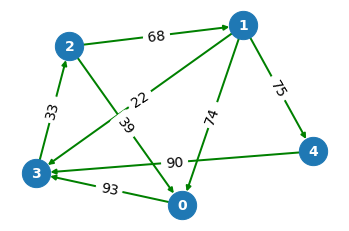

In [38]:
g, v = instance_generator(5)
BellmanFord(g, 5, len(g), 0, True) 

# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

Peor caso.

## Prueba del teorema

# 4. Correctitud

### **Teorema (Correctitud).**

## Prueba del Teorema

**Inicializacion**

**Mantencion**

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

### Análisis de resultados

#5.2. Tiempo de ejecucion (experimental)

**Analisis de resultados**